In [121]:
import pandas as pd
import numpy as np
df= pd.read_csv("D:/Ds Csv files Assignment/Multiple LR/50_Startups.csv")
df.iloc[:,0:4]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [122]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [123]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [124]:
df.shape

(50, 5)

In [125]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

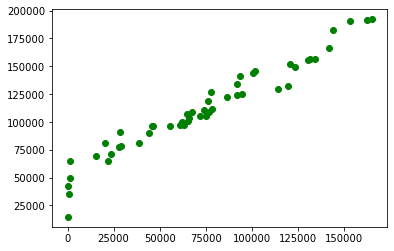

R&D Spend None


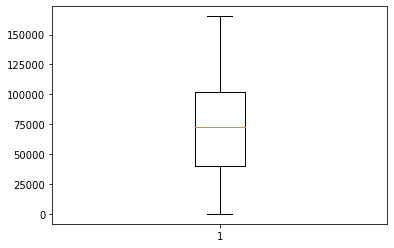

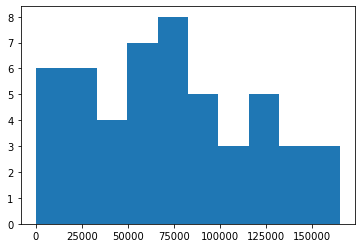

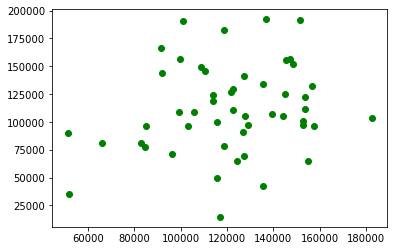

Administration None


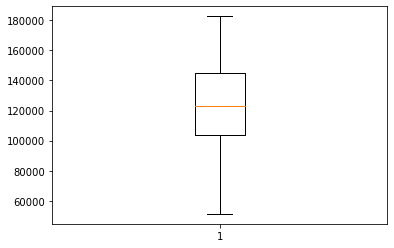

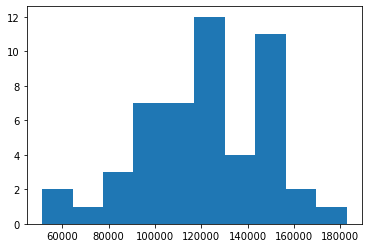

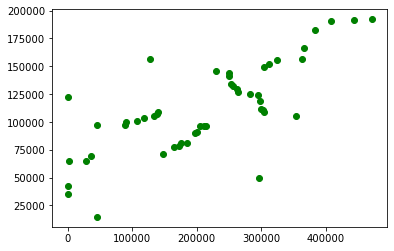

Marketing Spend None


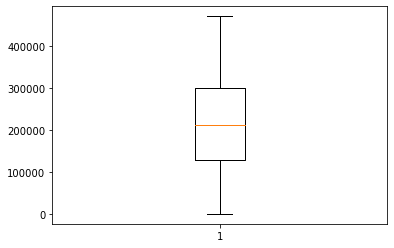

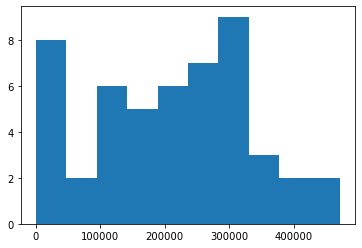

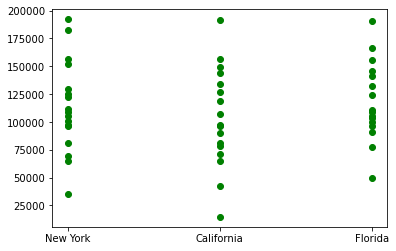

State None


In [126]:
X = df.iloc[:,0:4]
Y = df["Profit"]
import matplotlib.pyplot as plt
for i in X:
    plt.scatter(x=df[i],y=Y,color = 'g')
    print(i,plt.show())
    if (i!="State"):
        plt.boxplot(X[i])
        plt.show()
        plt.hist(X[i])
        plt.show()
        
# since state is categorical value the scatter plot looks different and no box plot is present.

# 

In [127]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
df["State"] = LE.fit_transform(df["State"])
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [128]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [129]:
X = df.iloc[:,0:3]
Y = df["Profit"]
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
ss= SS.fit_transform(X)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
ypred = LR.predict(X)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(Y,ypred)
Mse= mean_squared_error(Y,ypred)
print('r2',r2)
print("root mean square error",np.sqrt(Mse))

r2 0.9507459940683246
root mean square error 8855.344489015139


checking collinearity issues between two variables based on correlation

In [130]:
X=df[["R&D Spend"]]
Y = df["Marketing Spend"]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
ypred = LR.predict(X)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(Y,ypred)
Mse= mean_squared_error(Y,ypred)
print('r2',r2)


r2 0.5245353582320298


In [131]:
r2=r2_score(Y,ypred)
vif = 1/(1-r2)
vif

2.1032058162760427

Testing and training the data

In [132]:
X = df.iloc[:,0:3]
Y = df["Profit"]
from sklearn.model_selection import train_test_split
mse_train=[]
mse_test=[]
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(ss,Y, test_size=0.3)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    mse_train.append(mean_squared_error(Y_train,Y_pred_train))
    mse_test.append(mean_squared_error(Y_test,Y_pred_test))
print(mse_train)
print(mse_test)


import numpy as np
y = np.mean(np.sqrt(mse_train))
print("mean of all training root mean square errors", y)
a = np.mean(np.sqrt(mse_test))
print("mean of all testing root mean square errors",a)

[90402071.07772762, 88615175.58859673, 89449488.50437818, 95392451.45660526, 46533806.31452288, 52165519.60802616, 89164369.06330352, 101718497.93886317, 90594869.27330977, 89842359.3916475, 55038848.53269971, 97764223.56677413, 78607681.80529316, 64588038.35380015, 41638811.68189991, 56273552.15236117, 77333943.50592312, 90606358.92734233, 52617018.02394852, 84859754.94537044, 100987259.80136159, 49963998.2791874, 96559875.24528894, 84584336.02163804, 87343257.80759351, 77811967.38419001, 87124527.86244105, 78841825.03312518, 55506906.77815794, 77980975.27444644, 58886588.08679737, 84566284.52116393, 55278924.812401935, 63763161.73141937, 53236973.998062514, 84381306.6581575, 91918344.54879718, 82634351.29196909, 41187322.97433773, 96665424.34907308, 82260519.4395543, 35439387.666913904, 62088276.16247963, 80820567.42784888, 57773940.48668872, 54475225.87057071, 75508692.55000053, 66025540.62893652, 49329616.50483514, 70672650.09350689, 90632487.95801088, 72114103.88390362, 67182785.0

#  applying log transformations

In [133]:
import seaborn as sns
X = df.iloc[:,0:3]

df.isna().sum()
for i in X:
    if ((X.dtypes[i])!="O"):
        X[i] = np.log(X[i])
        
X['R&D Spend'].fillna((X['R&D Spend'].mean()),inplace=True)
X['Marketing Spend'].fillna((X['Marketing Spend'].mean()),inplace=True)
X


C:\Users\satam\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,R&D Spend,Administration,Marketing Spend
0,12.015815,11.826990,13.064277
1,11.999034,11.927533,13.003351
2,11.941075,11.524316,12.918862
3,11.880151,11.684117,12.856311
4,11.864338,11.422911,12.810849
5,11.789624,11.511071,12.801776
6,11.810178,11.899540,11.757571
7,11.777580,11.888138,12.688118
8,11.699758,11.909814,12.649518
9,11.722659,11.596155,12.628007


In [134]:
X = pd.concat([X.iloc[:,0:3], df['State']], join = 'outer', axis = 1)
Y = df["Profit"]
from sklearn.model_selection import train_test_split
mse_train=[]
mse_test=[]
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(ss,Y, test_size=0.3)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    mse_train.append(mean_squared_error(Y_train,Y_pred_train))
    mse_test.append(mean_squared_error(Y_test,Y_pred_test))
print(mse_train)
print(mse_test)


import numpy as np
y = np.mean(np.sqrt(mse_train))
print("mean of all training root mean square errors", y)
a = np.mean(np.sqrt(mse_test))
print("mean of all testing root mean square errors",a)


[77259627.42529702, 52310832.75412486, 48086013.7115601, 53571283.6028545, 43382015.752117574, 91662597.39925133, 56153900.891501084, 90030186.25358948, 76949011.46192877, 57726562.232212864, 93586850.37295413, 89967896.24368972, 57483543.221421994, 38155917.25910704, 50087192.65609157, 81575725.14142887, 43376667.04313323, 85745512.52059951, 85478194.66337335, 96822829.09262735, 75936426.70685609, 87875687.60138029, 87862780.38652696, 84963175.4007392, 84636175.77367519, 80039672.1109572, 92408480.09128079, 63812155.595092826, 52941345.29549052, 53422286.000485696, 52159560.117977075, 54558989.24006418, 80425357.15919793, 92965844.45779061, 91573281.82088423, 73733550.81269954, 47273480.72094353, 81120935.53451818, 93006499.58568579, 83474126.10708539, 44455050.45665991, 71740736.00692655, 95482698.0132723, 50402265.27843402, 86134103.4680923, 84920256.72240067, 57041672.434215724, 79833654.37936619, 97901232.02125573, 73653897.87004331, 85766149.06247333, 57918591.20764555, 71685629.

without transformation

In [135]:
X = df.iloc[:,0:4]
Y = df["Profit"]
from sklearn.model_selection import train_test_split
mse_train=[]
mse_test=[]
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(ss,Y, test_size=0.3)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    mse_train.append(mean_squared_error(Y_train,Y_pred_train))
    mse_test.append(mean_squared_error(Y_test,Y_pred_test))
print(mse_train)
print(mse_test)


import numpy as np
y = np.mean(np.sqrt(mse_train))
print("mean of all training root mean square errors", y)
a = np.mean(np.sqrt(mse_test))
print("mean of all testing root mean square errors",a)

[77086610.37723565, 59894133.23987367, 82672093.69578248, 56883761.52852828, 84424182.84592229, 50052423.83710118, 86024675.02264197, 87754384.64976335, 80195473.49404489, 51529453.46646538, 49026576.83414611, 40185099.539596856, 70642606.90294223, 101281813.70663399, 93597713.55636786, 60867328.308347344, 87336275.53558975, 72727816.07455245, 78189814.36683814, 51248024.33565666, 79411636.86404294, 73305508.39313841, 50366766.65936021, 91646031.90698154, 75891243.54694514, 55287614.615214616, 79533886.07344976, 90184483.21969926, 90199110.57006295, 82458267.83038636, 60153139.7900311, 80020223.16959468, 84606842.65408878, 98713361.13736598, 80200490.32650346, 76405382.32270217, 88262150.83492686, 85730891.47478409, 91787050.19663604, 85887699.99197191, 47479499.46702843, 98986337.946744, 73840795.89561151, 68448540.16286188, 83234946.15442963, 76027040.0873782, 69084608.3695306, 84932620.3202094, 82619171.99286735, 64910135.565699086, 75744658.39072396, 91297419.18096897, 72082088.080

In [136]:
df['R&D Spend'].describe()


count        50.000000
mean      73721.615600
std       45902.256482
min           0.000000
25%       39936.370000
50%       73051.080000
75%      101602.800000
max      165349.200000
Name: R&D Spend, dtype: float64

In [137]:
df['Administration'].describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64

In [138]:
df['Marketing Spend'].describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64

In [139]:
from tkinter import * 
from tkinter import messagebox
from decimal import * 
top=Tk()
top.geometry("600x650")
title=Label(top,text="Profit prediction",font=("Arial",25)) 
title.place(x=100,y=0) 
na=Entry(top)
na.place(x=250,y=50)
RDSpend_label=Label(top,text="R&D Spend :")
RDSpend_label.place(x=150,y=50)
ad=Entry(top)
ad.place(x=250,y=100)
Administration_label=Label(top,text="Administration :")
Administration_label.place(x=150,y=100)

ms=Entry(top)
ms.place(x=250,y=150)
MarketingSpend_label=Label(top,text="Marketing Spend:")
MarketingSpend_label.place(x=150,y=150)

dr=IntVar() 
d1=Radiobutton(top, text="California", variable=dr, value=0) 
d1.place(x=250,y=200)
d2=Radiobutton(top, text="Florida", variable=dr, value=1)
d2.place(x=330,y=200)
d2=Radiobutton(top, text="New York", variable=dr, value=2)
d2.place(x=410,y=200)
drug_label=Label(top,text="Drug :") 
drug_label.place(x=150,y=200)
def action(): 
    if (na.get() == "") or (ad.get() == "") or (ms.get() == ""):
        messagebox.showwarning("warning","All Fields are Required")
    elif(float(na.get()) <= 0.00) or (float(na.get()) >= 165349.20):
        messagebox.showwarning("warning","Enter Valid R&B Value")
    elif(float(ad.get()) <= 51283.14) or (float(ad.get()) >= 182645.56):
        messagebox.showwarning("warning","Enter Valid Administration Value")
    elif(float(ad.get()) <= 0.00) or (float(ad.get()) >= 471784.10):
        messagebox.showwarning("warning","Enter Valid Administration Value")
    
        
btn=Button(top,text="submit",command=action,width=30,height=2) 
btn.place(x=150,y=350)
top.mainloop()



# Corolla data set


In [140]:
import pandas as pd
df=pd.read_csv("D:/Ds Csv files Assignment/Multiple LR/ToyotaCorolla.csv",encoding="ISO-8859-1")
df = df.loc[:, ["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
df


,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [141]:
df.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [142]:
df.tail()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250
1435,76,1,110,1600,5,5,19,1114,6950


In [143]:
df[(df["Age_08_04"]==68)].mean()

Age_08_04           68.000000
KM               81877.507246
HP                 101.492754
cc                1545.202899
Doors                3.942029
Gears                5.028986
Quarterly_Tax       81.231884
Weight            1052.971014
Price             9047.463768
dtype: float64

In [144]:
df.shape

(1436, 9)

In [145]:
df.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Price'],
      dtype='object')

In [146]:
df.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [147]:
df.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


In [148]:
X= df.iloc[:,0:7]
Y=df["Price"]


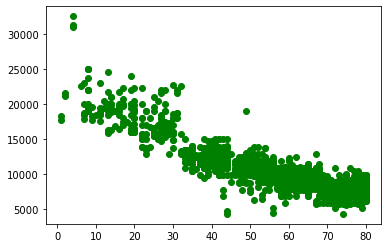

Age_08_04 None


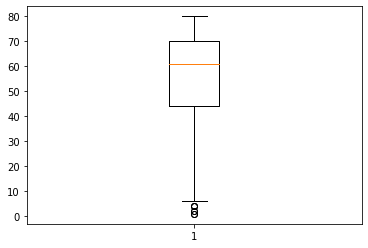

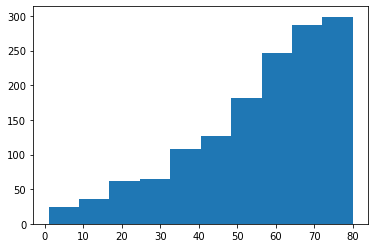

-----------------------------------------------------


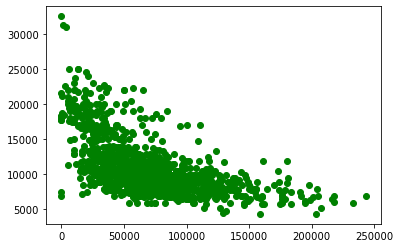

KM None


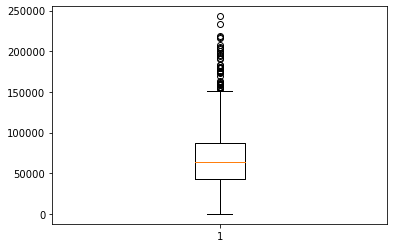

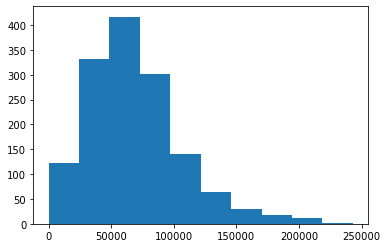

-----------------------------------------------------


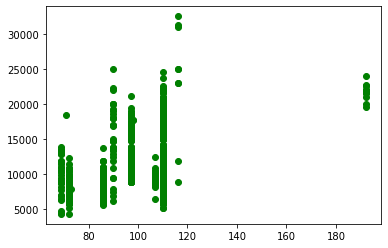

HP None


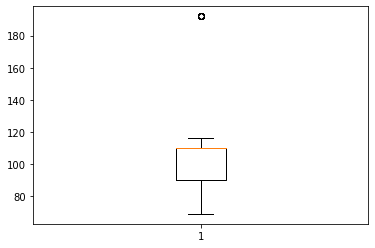

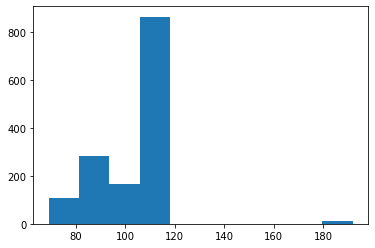

-----------------------------------------------------


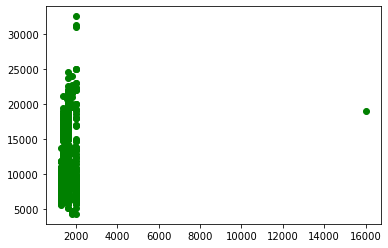

cc None


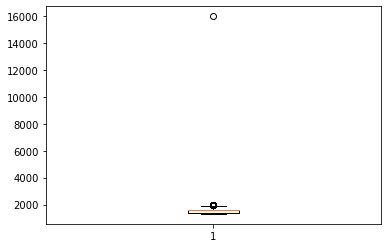

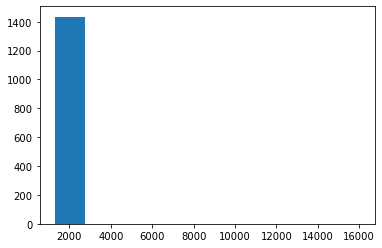

-----------------------------------------------------


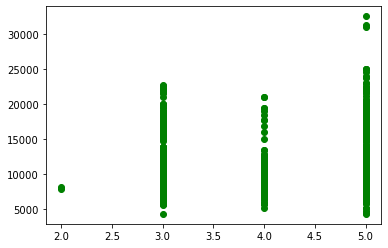

Doors None


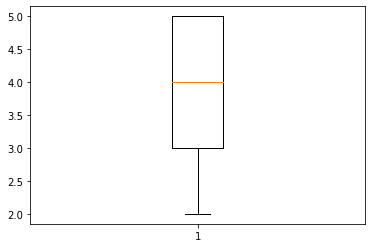

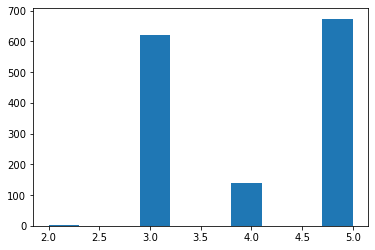

-----------------------------------------------------


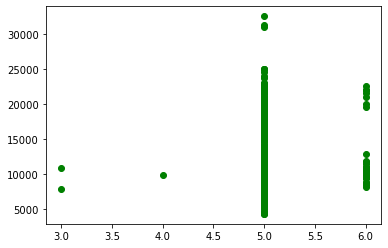

Gears None


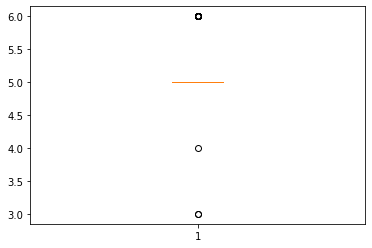

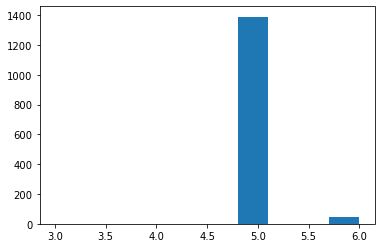

-----------------------------------------------------


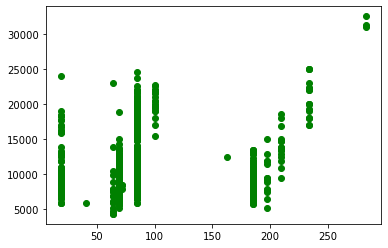

Quarterly_Tax None


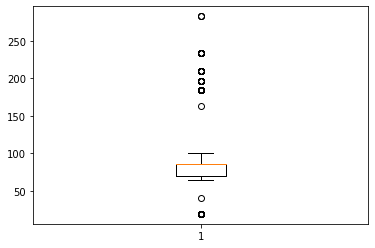

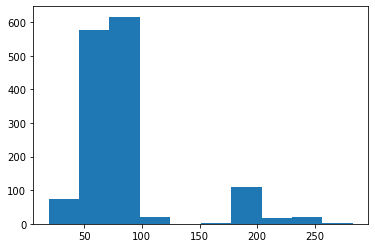

-----------------------------------------------------


In [149]:
import matplotlib.pyplot as plt
for i in X:
    plt.scatter(x=X[i],y=Y,color='g')
    print(i,plt.show())
    plt.boxplot(X[i])
    plt.show()
    plt.hist(X[i])
    plt.show()
    print("-----------------------------------------------------")

In [150]:
for i in X:
    var=df[i].var()
    mean=df[i].mean()
    print(i,var)
    print(i,mean)

Age_08_04 345.9595663525254
Age_08_04 55.94707520891365
KM 1406733707.0021696
KM 68533.25974930362
HP 224.43274824570776
HP 101.50208913649026
cc 180104.1304256839
cc 1576.8558495821726
Doors 0.9075927130142623
Doors 4.0334261838440115
Gears 0.03553618743509323
Gears 5.0264623955431755
Quarterly_Tax 1691.5626682713757
Quarterly_Tax 87.12256267409471


In [151]:
X=df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax','Weight']]
Y=df["Price"]
from sklearn.preprocessing import StandardScaler
SS =StandardScaler()
SS_count = SS.fit_transform(X)
SS_count


array([[-1.77196633, -0.57469494, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       [-1.77196633,  0.11745379, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       [-1.71818412, -0.71538641, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [ 0.75579727, -1.37670303, -1.03513832, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [ 1.0784905 , -1.82784925,  0.5674405 , ..., -0.14042519,
        -1.65690726,  0.78939926]])

# checking for multicollinearity isses 

In [152]:
X=df[['Weight']]
Y = df['Quarterly_Tax']
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
ypred = LR.predict(X)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(Y,ypred)
Mse= mean_squared_error(Y,ypred)
print('r2',r2)

r2 0.39204345135277063


In [153]:
r2=r2_score(Y,ypred)
vif = 1/(1-r2)
vif

1.6448543933363506

no multicollinearity issues

In [154]:
X=df[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax','Weight']]
Y=df["Price"]
from sklearn.preprocessing import StandardScaler
SS =StandardScaler()
SS_count = SS.fit_transform(X)
SS_count

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_count,Y, test_size=0.3)
mse_train=[]
mse_test=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_count,Y, test_size=0.3)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    mse_train.append(mean_squared_error(Y_train,Y_pred_train))
    mse_test.append(mean_squared_error(Y_test,Y_pred_test))
print(mse_train)
print(mse_test)
import numpy as np
y = np.mean(np.sqrt(mse_train))
print(y)
a = np.mean(np.sqrt(mse_test))
print(a)

[1809014.7372087073, 1813282.1298693633, 1691174.1369610738, 1682472.22598709, 1799502.8089633714, 1684971.585706695, 1799170.2948777394, 1740647.3811626423, 1850803.4598842768, 1683280.2979217004, 1665283.1433561775, 1788788.921305179, 1636979.7974637225, 1855957.965452372, 1819225.0621733186, 1814262.3127196226, 1816306.358795223, 1698272.4700252186, 1706406.9542886112, 1820236.6848528439, 1959153.940223441, 1787878.2313464575, 1708600.6311277784, 1692071.1982906205, 1793916.2224406959, 1904455.7294226054, 1702899.4931283616, 1637637.952821476, 1684370.2696468418, 1850026.923989992, 1812788.427996598, 1769744.502170975, 1857375.8527380489, 1816416.8990415575, 1817130.080143719, 1811040.4945306398, 1780895.1407926055, 1793419.0423284934, 1730778.4579655107, 1787064.4254619067, 1779771.9796397102, 1722691.1883210202, 1591372.0743387209, 1749642.1098318552, 1772341.5538270809, 1904163.700233612, 1867184.7933934762, 1848942.4289675136, 1994824.2109974457, 1746762.3577004191, 1648188.3475

In [155]:
import seaborn as sns
X = df.iloc[:,0:7]

df.isna().sum()
for i in X:
    if ((X.dtypes[i])!="O"):
        X[i] = np.log(X[i])
        

X


C:\Users\satam\AppData\Local\Temp/ipykernel_11904/3328366234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = np.log(X[i])


,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108
1,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108
2,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108
3,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108
4,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108
...,...,...,...,...,...,...,...
1431,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107
1432,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107
1433,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107
1434,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107


In [ ]:
Y=df["Price"]
from sklearn.model_selection import train_test_split
mse_train=[]
mse_test=[]
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    mse_train.append(mean_squared_error(Y_train,Y_pred_train))
    mse_test.append(mean_squared_error(Y_test,Y_pred_test))
print(mse_train)
print(mse_test)


import numpy as np
y = np.mean(np.sqrt(mse_train))
print("mean of all training root mean square errors", y)
a = np.mean(np.sqrt(mse_test))
print("mean of all testing root mean square errors",a)


C:\Users\satam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\satam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\satam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

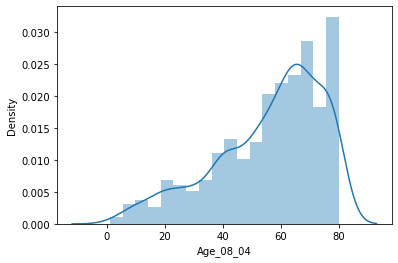

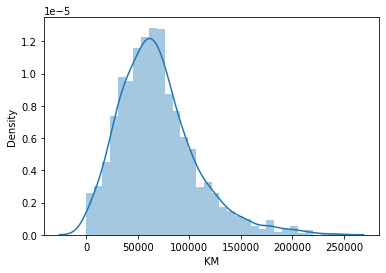

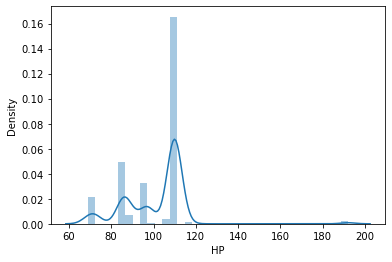

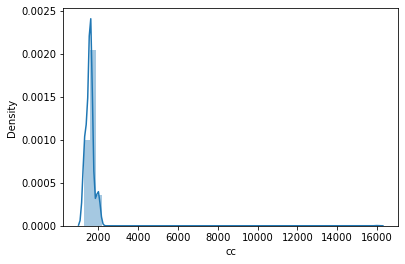

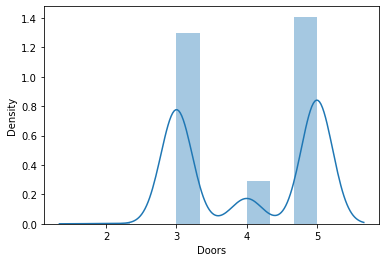

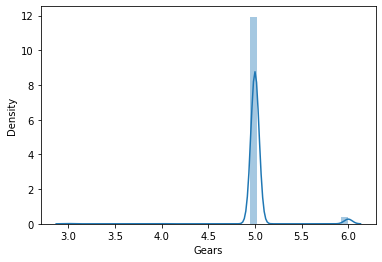

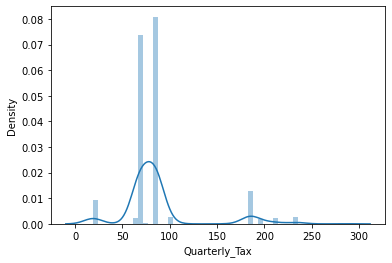

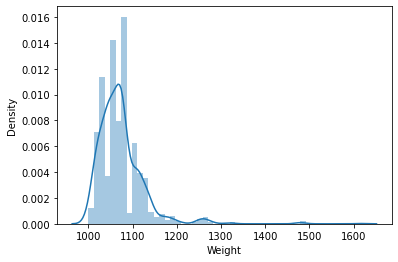

<Figure size 432x288 with 0 Axes>

In [110]:
import seaborn as sns
for i in X:
    sns.distplot(X[i])
    plt.figure()